In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os.path import join as pjoin
from sklearn.decomposition import FastICA
from sklearn.datasets import load_iris

font = {"size": 20}
matplotlib.rc("font", **font)
matplotlib.rcParams["text.usetex"] = True


In [2]:
data_dir = "./data/"
X = np.load(pjoin(data_dir, "foreground.npy"))
Y = np.load(pjoin(data_dir, "background.npy"))
print(X.shape)
print(Y.shape)

DATA = np.vstack((X, Y))
print(DATA.shape)

(2500, 784)
(2500, 784)
(5000, 784)


In [3]:
target = ['foreground'] * 2500 +  ['background'] * 2500
colors = ['blue', 'red']

unique_categories = np.unique(target)
category_map = {cat: idx for idx, cat in enumerate(unique_categories)}
numeric_categories = np.array([category_map[cat] for cat in target])

In [4]:
category_map

{'background': 0, 'foreground': 1}

In [5]:
## ICA
d = 2  # Number of components to extract
ica = FastICA(n_components=d, random_state=0)
dt_ica = ica.fit_transform(DATA)  # Extract the independent components


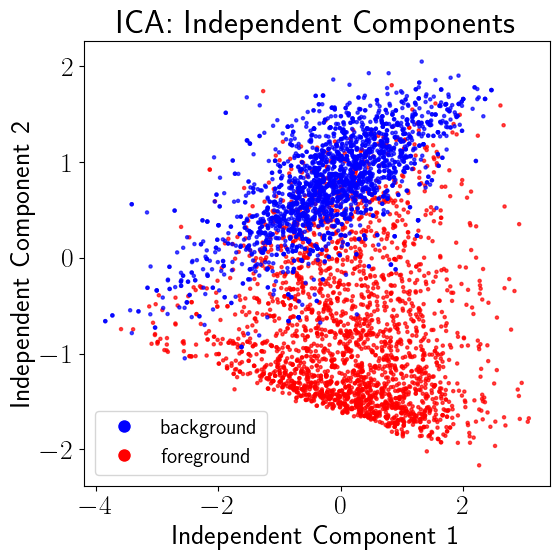

In [7]:
plt.figure(figsize=(6, 6))

scatter = plt.scatter(dt_ica[:, 0], dt_ica[:, 1], c=numeric_categories, cmap=plt.cm.colors.ListedColormap(colors), alpha=0.7, s = 5)
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color) for label, color in zip(unique_categories, colors)]
plt.legend(handles=handles, loc='lower left', fontsize = 15)
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('ICA: Independent Components')
plt.tight_layout()
plt.savefig('./out/corrupted_lines_ICA.png', dpi = 300)

plt.show()